# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

C:\Users\20192024\Anaconda3\envs\my_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


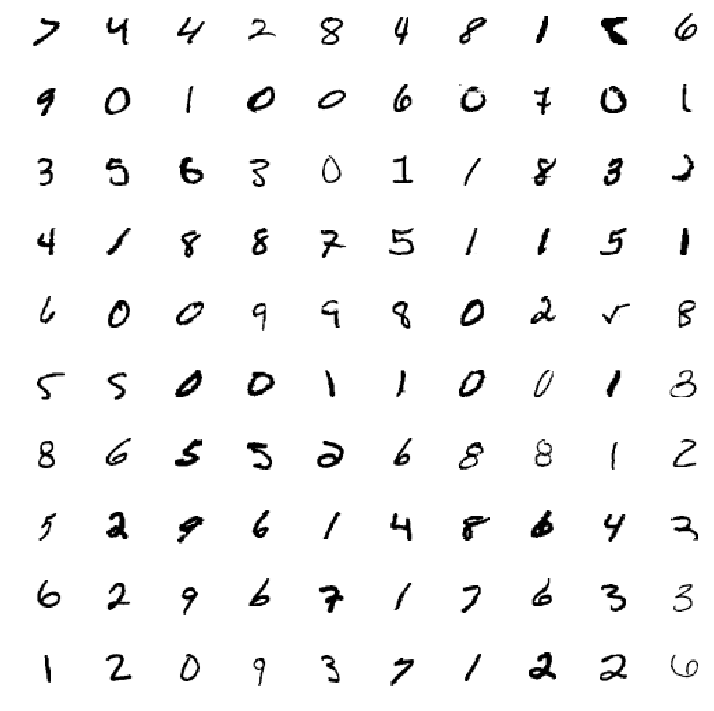

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

Compile and train the network (note that this could take a while).

In [3]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 241us/step - loss: 0.2516 - acc: 0.9235 - val_loss: 0.0538 - val_acc: 0.9824
Epoch 2/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0815 - acc: 0.9752 - val_loss: 0.0395 - val_acc: 0.9873: 0.0909 - acc - ETA: 8s - loss: 0.0 - ETA: 7s - loss: 0.0886 - acc: 0 - ETA: 7s - loss: 0.0885 - acc: 0.972 - ETA: 6s - loss: 0.0887 - acc: 0.9 - ETA: 6s - loss: 0.0873 - acc: - ETA: 6s - loss - ETA: 4s - loss: 0.0860 - acc: 0.974 - ET - ETA: 2s - loss: 0.0840 - acc: 0. - ETA: 2s - loss: 0.0839 - acc:  - ETA: 2s - loss: 0.0829 - acc: 0. - ETA: 1s 
Epoch 3/12
60000/60000 [==============================] - 11s 176us/step - loss: 0.0643 - acc: 0.9807 - val_loss: 0.0396 - val_acc: 0.9869: 9s - l - ETA: 8s - loss: 0.0646 - ac - ETA: 7s - loss:  - ETA: 5s - loss: 0 - ETA: 4s - loss: 0.065 - ETA: 3s - loss: 0.0646 - acc: 0.980 - ETA: 3s - loss: 0.0646 - acc:  - ETA: 3s -

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027725098769350098
Test accuracy: 0.9921


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

(20, 584, 565, 3)


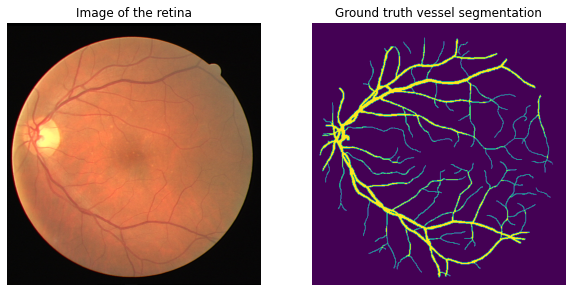

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
from unet_utils import load_data

# location of the DRIVE dataset
data_folder = "./DRIVE/"
train_paths = glob(data_folder + 'training/images/*.tif')
images, masks, segmentations = load_data(train_paths)



# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

In [70]:
train_images[0].shape

(584, 565, 3)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(16, 32, 32, 3)


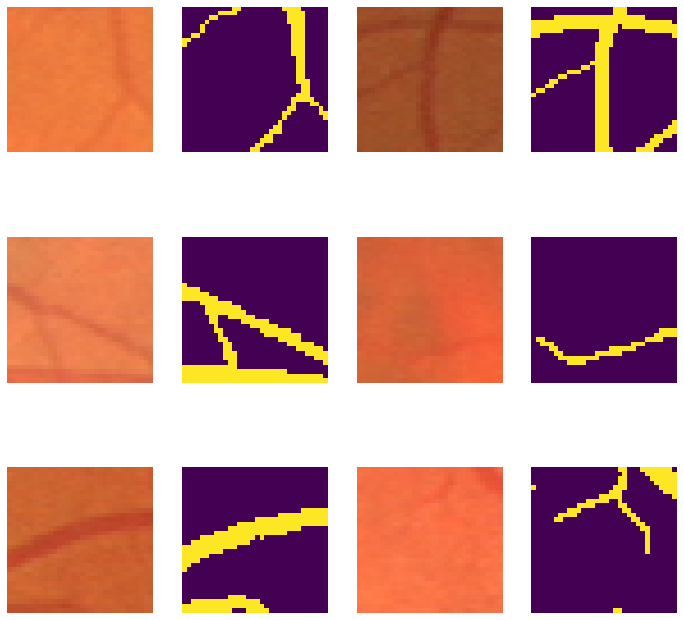

In [71]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [72]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [73]:
import os
from unet_model import unet
from unet_utils import datagenerator
from keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 100
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)


C:\Users\20191819\.conda\envs\8dm50\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 - 44s - loss: 0.5101 - accuracy: 0.8284 - val_loss: 0.5184 - val_accuracy: 0.9211
Epoch 2/100
50/50 - 42s - loss: 0.3085 - accuracy: 0.9478 - val_loss: 4.4135 - val_accuracy: 0.1019
Epoch 3/100
50/50 - 47s - loss: 0.2132 - accuracy: 0.9570 - val_loss: 0.2826 - val_accuracy: 0.9211
Epoch 4/100
50/50 - 43s - loss: 0.1752 - accuracy: 0.9595 - val_loss: 0.9634 - val_accuracy: 0.6766
Epoch 5/100
50/50 - 44s - loss: 0.1739 - accuracy: 0.9556 - val_loss: 11.7931 - val_accuracy: 0.5335
Epoch 6/100
50/50 - 43s - loss: 0.1426 - accuracy: 0.9598 - val_loss: 0.9479 - val_accuracy: 0.5668
Epoch 7/100
50/50 - 45s - loss: 0.1223 - accuracy: 0.9628 - val_loss: 0.4445 - val_accuracy: 0.7971
Epoch 8/100
50/50 - 44s - loss: 0.1204 - accuracy: 0.9620 - val_loss: 0.2819 - val_accuracy: 0.9249
Epoch 9/100
50/50 - 44s - loss: 0.1169 - accuracy: 0.9620 - val_loss: 0.2026 - val_accuracy: 0.9372
Epoch 10/100
50/50 - 44s - loss: 0.1122 - accuracy: 0.9630 - val_loss: 0.1893 - val_accuracy: 0.939

### Visualizing the segmentation results

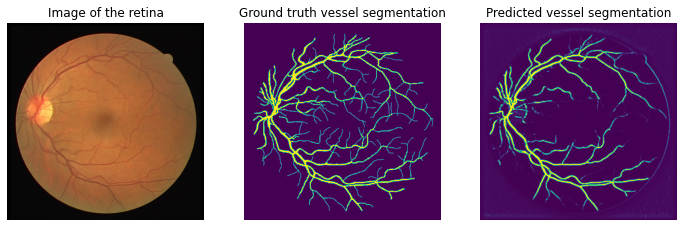

In [74]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

In [76]:
#thresholding the predicted segmentation
test_prediction[test_prediction>0.1] =1
test_prediction[test_prediction<0.1] =0
#calculating the dice score
A = test_prediction[0]
B = test_segmentations[0]
dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

#printing the results
print("The dice score for the first test image is: ", dice)

The dice score for the first test image is:  0.7472542124297928


# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

_These parameters correspond to the weights of the neurons. Also known as the coefficients of the model which are 'chosen' / learned by the network / model itself during the training process by means of some optimization strategy._

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>

_The general expression for number of parameters of a convolutional layer, if we include the bias (+1) is as follows:_

$((M\cdot N \cdot D)+1)\cdot K)$

_With $M$ the width of the kernel, $N$ the height of the kernel, $D$ the amount of feature maps used as input for the current layer used in the previous layer and $K$ the amount of filter maps as output of the current layer_

_In a fully connected layer every neuron is connected to every neuron in the previous layer. Hence, the general expression for number of parameters of a fully-connected layer is as follows:_

$(P \cdot C)+(1 \cdot C)$

_Here $P$ is the amount of neurons in the previous layer and $C$ is the amount of neurons in the current layer. We add the $1 \cdot C$ because we also need to include the bias term when calculating the number of parameters_


## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 




In [14]:
# In order to convert a fully connected layer to a convolutional layer with equivalent output,
# we have to pay attention to the size of the kernel used in the convolutional layer. 
# The kernel size has to be the same as the size of the input feature array and the filter size must be equal to the input volume.
# Consequently, the output will be equal to the output we received from a fully-connected layer


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (12, 12), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(10, (1, 1), activation='softmax'))
model.add(Flatten())

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 128)         1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 1, 128)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 10)          1290      
__________

_Indeed in the model summary we see that the total number of (trainable) parameters equals 1,199,882 which is the
same amount as for the fully connected model.
Moreover for every layer that has # parameters > 0 , the same amount is present as for the layers
of the first MNIST neural network example if we compare the two networks layer wise.
E.g. the last layer of the network with fully-connected layers has 1290 parameters
The fully convolutional network also has 1290 in the layer that comes before the flattening layer._

## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>



_The U-Net architecture consists of a downsampling / contracting path (= encoder) and an upsampling / expanding path (= decoder). With the skip connections the feature maps on a particular 'level' / layer in the encoder path can be concatenated to the feature maps on the corresponding 'level' / layer of the decoder path. Skip connections allow layers to 'skip' layers and connect to layers further up the U-Net architecture. As a result, spatial information / original feature maps can be provided from the encoder to the corresponding decoder layers so that finer details extracted during downsampling can be recovered when producing the output masks. Consequently, more contextual information of the image can be considered when predicting the label of each individual pixel in the image. It helps to recover the full spatial resolution, that was 'lost' during downsampling, at the network output. Moreover, by using a skip connection, we provide an extra / alternative path for the gradient computation during back propagation. As a result, convergence might be reached faster and the problem of vanishing gradients might be avoided / reduced. This is for the reason that with very deep architectures / a lot of layers, the gradient is calculated as a product of many small numbers (backpropagation & chain rule) which might cause the gradient itself to be very small and eventually 'vanish'. In other words, skip connections enable uninterrupted gradient flow from the first to the last layer thereby avoiding / reducing the vanishing gradient problem._ 


_In theory, yes, it is possible to train the same U-Net architecture without skip connections. However, it might be impossible to train the whole model / reach convergence because of vanishing gradient problem described above. Moreover, the spatial resolution of the predicted image will not be as high as the input images. Since, without skip connections, the images will only be downscaled and upscaled again without any connection between corresponding layers in the contracting and expanding path. As a result the spatial resolution of the output image will be lower because the finer details are lost during downsampling and not recovered again (since they are just upscaled again). Moreover, the predictions for, for instance, the segmented image may be less accurate because these finer details are no longer used as information for the final prediction. As a result of these finer details missing, important boundaries in the image that would help the network to segment a region are not so easily distinguishable anymore causing worse segmentation performance._ 

## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>

_With data augmentation, images similar to the training set but slightly different can be generated. This way we artificially increase our training set / sample size. Increasing the dataset size results in less overfitting because with more different samples the model is less likely to yield a fit specific for all the different samples (there is just too much variation) and is thus forced to generalize._

_In theory, yes we can use data augmentation for the test set as well while keeping in mind that we do not use the same augmented data for the training and test set, as the test set needs to remain independent of the training set. However, data augmentation is most commonly used for increasing training dataset in size and, as mentioned, increase the generalization of the model. It is not necessary to do it on the test set as the goal of the test set is the final independent evaluation of model performance. The only reason one might have for doing data augmentation on the test set is getting a more robust measure for model performance since the performance metric (e.g. MSE, accuracy) is then calculated over a larger sample size._ 

## Data augmentation: random brightness

<font color='#770a0a'>Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above.</font>

In [10]:
# Random brightness augmentation is included in the datageneratorbright function in the unet_utils file
# Before the patches are extracted from the images, we, for each image, randomly alter the brightness and
# add this new altered image to the training dataset
# This thus results in a doubling of the training dataset size (from 20 to 40 images)

import os
import numpy as np
from unet_model import unet
from unet_utils import datagenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib


# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

# We 'augment' the x data by adding another image that is the same as the image above only with a random brightness

factor=0.5

# Convert rgb to hsb (or hsv) to easily access the brightness value
hsv = matplotlib.colors.rgb_to_hsv(X_train) 
hsv[:, :, 2] = hsv[:, :, 2] * (factor + np.random.uniform()) #scale channel V uniformly
hsv[:, :, 2][hsv[:, :, 2] > 255] = 255 #reset out of range values
im = np.array(matplotlib.colors.hsv_to_rgb(hsv))
# We 'add' our new generated sample (which is just the original sample but with a different brightness)
# to the already existing X_train set
X_train = np.concatenate((X_train,im), axis = 0);

# X train now has dimension (2,width,height,colorchannels)
# And thus contains of now 2 image samples

# Make sure to also increase the y_train in sample size
# We do this by adding the same target segmentation again to y_train

y_train = np.concatenate((y_train, y_train), axis=0)

# So now both X_train as y_train have shape (2,width,height,..)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 100
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
# We use the datageneratorbright function because this contains the random brightness data augmentation
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(2, 584, 565, 3)
(2, 584, 565, 1)


C:\Users\20191819\.conda\envs\8dm50\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 - 56s - loss: 0.5218 - accuracy: 0.8148 - val_loss: 0.3717 - val_accuracy: 0.9211
Epoch 2/100
50/50 - 49s - loss: 0.2843 - accuracy: 0.9539 - val_loss: 0.2855 - val_accuracy: 0.9211
Epoch 3/100
50/50 - 47s - loss: 0.1968 - accuracy: 0.9607 - val_loss: 0.2817 - val_accuracy: 0.9211
Epoch 4/100
50/50 - 36s - loss: 0.1489 - accuracy: 0.9629 - val_loss: 0.3496 - val_accuracy: 0.9211
Epoch 5/100
50/50 - 39s - loss: 0.1312 - accuracy: 0.9642 - val_loss: 0.3563 - val_accuracy: 0.9212
Epoch 6/100
50/50 - 39s - loss: 0.1202 - accuracy: 0.9641 - val_loss: 0.4306 - val_accuracy: 0.9207
Epoch 7/100
50/50 - 37s - loss: 0.1145 - accuracy: 0.9639 - val_loss: 0.3643 - val_accuracy: 0.9245
Epoch 8/100
50/50 - 35s - loss: 0.1115 - accuracy: 0.9641 - val_loss: 0.4182 - val_accuracy: 0.9228
Epoch 9/100
50/50 - 35s - loss: 0.0999 - accuracy: 0.9665 - val_loss: 0.3304 - val_accuracy: 0.9267
Epoch 10/100
50/50 - 35s - loss: 0.0955 - accuracy: 0.9673 - val_loss: 0.3101 - val_accuracy: 0.9320

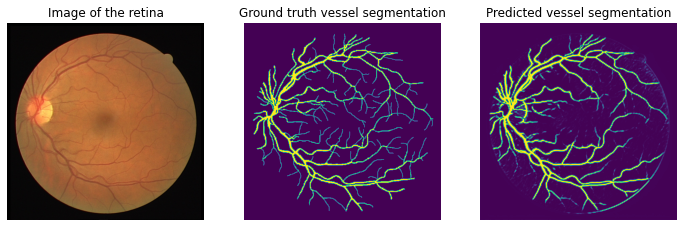

In [11]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

The dice score for the first test image is:  0.7544422654067867


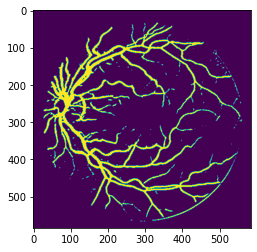

In [39]:
#thresholding the predicted segmentation
test_prediction[test_prediction>0.1] =1
test_prediction[test_prediction<0.1] =0

#calculating the dice score
A = test_prediction[0]
B = test_segmentations[0]
dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

#printing the results
print("The dice score for the first test image is: ", dice)

The dice score of the brightness augmentation method is 0.7544. Compared to the baseline (with a dice score of 0.7473) this is a very small improvement which doesn't seem to be significant.

## Data augmentation: random brightness + b-spline geometric transformation

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 584, 565, 3)
(2, 584, 565, 1)


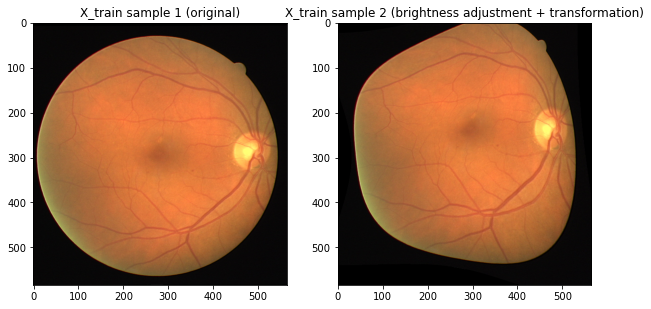

In [64]:
import os
from unet_model import unet
from unet_utils import datagenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import gryds
import matplotlib

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

# We 'augment' the x data by adding another image that is the same as the image above only with a random brightness 
# and a random spline transformation

factor=0.5

# Convert rgb to hsb (or hsv) to easily access the brightness value
hsv = matplotlib.colors.rgb_to_hsv(X_train) 
hsv[:, :, 2] = hsv[:, :, 2] * (factor + np.random.uniform()) #scale channel V uniformly
hsv[:, :, 2][hsv[:, :, 2] > 255] = 255 #reset out of range values
im = np.array(matplotlib.colors.hsv_to_rgb(hsv))

# We 'add' our new generated sample (which is just the original sample but with a different brightness)
# to the already existing X_train set

# X_train = np.concatenate((X_train,im), axis = 0);

# X train now has dimension (2,width,height,colorchannels)
# And thus contains of now 2 image samples

# Next to adjusting the brightness randomly, we also transform the image with a b-spline geometric transformation
# We do the same transformation on the different color channel images separately and then combine them again
# into one RGB image

#defining the grid
random_grid = np.random.rand(2, 3, 3)
random_grid -= 0.5
random_grid /= 5

#defining the bspline 
bspline = gryds.BSplineTransformation(random_grid)

#interpolation over y_train
interpolator = gryds.Interpolator(y_train[0,:,:,0])
transformed_image_y = np.zeros((1,y_train.shape[1], y_train.shape[2],1))
transformed_image_y[0,:,:,0] = interpolator.transform(bspline)

#concatenate y_train
y_train = np.concatenate((y_train, transformed_image_y), axis=0)

# Define an interpolator object for the image:
transformed_image = np.zeros((1,X_train.shape[1], X_train.shape[2], X_train.shape[3]))
for color in range(images.shape[3]):
    # We only perform the transformation on the sample in X_train for which we also did random brightness adjustment 
    interpolator = gryds.Interpolator(im[0,:,:,color])

    # Transform the image using the B-spline transformation
    transformed_image[0,:,:,color] = interpolator.transform(bspline)

#concatenate X_train
X_train = np.concatenate((X_train,transformed_image),axis=0)


#plotting the results
plt.figure(figsize=(10,12))
plt.subplot(1,2,1, title='X_train sample 1 (original)')
plt.imshow(X_train[0])
plt.subplot(1,2,2, title='X_train sample 2 (brightness adjustment + transformation)')
plt.imshow(X_train[1])


# So now both X_train as y_train have shape (2,width,height,..)
print(X_train.shape)
print(y_train.shape)



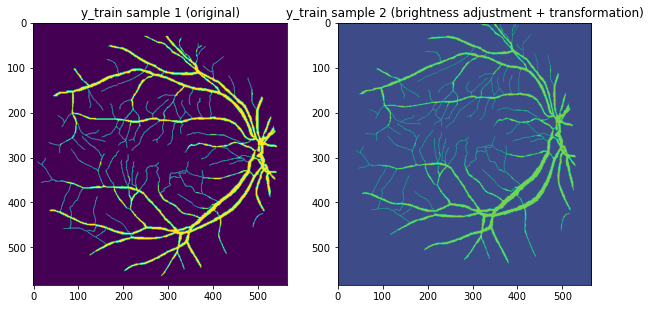

In [65]:
#plotting the new segmentations
plt.figure(figsize=(10,12))
plt.subplot(1,2,1, title='y_train sample 1 (original)')
plt.imshow(y_train[0])
plt.subplot(1,2,2, title='y_train sample 2 (brightness adjustment + transformation)')
plt.imshow(y_train[1])

In [66]:
# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 100
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
# We use the datageneratorbright function because this contains the random brightness data augmentation
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

C:\Users\20191819\.conda\envs\8dm50\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
50/50 - 37s - loss: 0.4920 - accuracy: 0.4682 - val_loss: 0.4780 - val_accuracy: 0.9211
Epoch 2/100
50/50 - 34s - loss: 0.2662 - accuracy: 0.5372 - val_loss: 0.3025 - val_accuracy: 0.9211
Epoch 3/100
50/50 - 34s - loss: 0.1951 - accuracy: 0.5370 - val_loss: 0.2777 - val_accuracy: 0.9211
Epoch 4/100
50/50 - 34s - loss: 0.1644 - accuracy: 0.5270 - val_loss: 0.2662 - val_accuracy: 0.9211
Epoch 5/100
50/50 - 36s - loss: 0.1341 - accuracy: 0.5223 - val_loss: 0.3072 - val_accuracy: 0.9211
Epoch 6/100
50/50 - 34s - loss: 0.1168 - accuracy: 0.5175 - val_loss: 0.3477 - val_accuracy: 0.9212
Epoch 7/100
50/50 - 34s - loss: 0.1054 - accuracy: 0.5288 - val_loss: 0.3846 - val_accuracy: 0.9211
Epoch 8/100
50/50 - 38s - loss: 0.1005 - accuracy: 0.5523 - val_loss: 0.3313 - val_accuracy: 0.9256
Epoch 9/100
50/50 - 35s - loss: 0.0945 - accuracy: 0.5489 - val_loss: 0.2452 - val_accuracy: 0.9319
Epoch 10/100
50/50 - 35s - loss: 0.0936 - accuracy: 0.5368 - val_loss: 0.2081 - val_accuracy: 0.9420

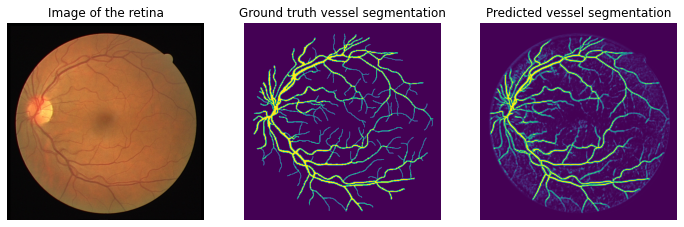

In [67]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

The dice score for the first test image is:  0.6319749073800487


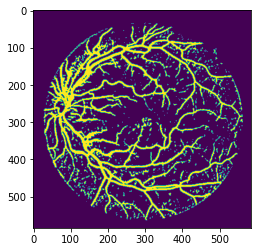

In [68]:
#thresholding the predicted segmentation
test_prediction[test_prediction>0.1] =1
test_prediction[test_prediction<0.1] =0

#calculating the dice score
A = test_prediction[0]
B = test_segmentations[0]
dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

#printing the results
print("The dice score for the first test image is: ", dice)

The dice score of the brightness augmentation + gryds is equal to 0.6320. Compared to the dice score for the brightness augmentation only (0.7544), the combined augmentation has a worse outcome. Compared to the baseline, with a dice score of 0.7473, the combined method is not an improvement either. 

This can also be seen in the visualization of the segmentation where some parts seem to be over-segmented. Furthermore, the accuracy of the training and validation set when training the model is significantly lower for the combined augmentation compared to the baseline and brightness method both.
